# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This time, I analyzed using the dataset of The Movie Database (TMDb). This dataset contained multiple types such as number and object, so I converted the types. Some data had missing values, so I deleted unnecessary data. Using this dataset, I conducted an analysis to answer the questions listed below.

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. 
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 


### Question(s) for Analysis
- What is the highest revenue movie?
- Which genre is the most in the top 100 movie ranking with high revenue?
- What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties

In [2]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09


### Data Cleaning

In [7]:
# Only the columns necessary to answer the questions have been excerpted.
columns = ['original_title', 'popularity', 'director', 'runtime', 'genres', 'vote_count',
           'vote_average', 'release_year', 'budget_adj', 'revenue_adj']

In [8]:
# Check point
df2 = df[columns]
df2.head(1)

original_title  popularity         director  runtime  \
0  Jurassic World   32.985763  Colin Trevorrow      124   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09

In [9]:
# Rename columns
df2 = df2.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue'})
df2.head(1)

original_title  popularity         director  runtime  \
0  Jurassic World   32.985763  Colin Trevorrow      124   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   

   release_year        budget       revenue  
0          2015  1.379999e+08  1.392446e+09

In [10]:
df2.isnull().sum()

original_title     0
popularity         0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

In [11]:
df2 = df2.dropna()
df2.isnull().sum()

original_title    0
popularity        0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10801 non-null  object 
 1   popularity      10801 non-null  float64
 2   director        10801 non-null  object 
 3   runtime         10801 non-null  int64  
 4   genres          10801 non-null  object 
 5   vote_count      10801 non-null  int64  
 6   vote_average    10801 non-null  float64
 7   release_year    10801 non-null  int64  
 8   budget          10801 non-null  float64
 9   revenue         10801 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 928.2+ KB


In [13]:
# change type
df2['budget'] = df2['budget'].astype('int64')
df2['revenue'] = df2['revenue'].astype('int64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10801 non-null  object 
 1   popularity      10801 non-null  float64
 2   director        10801 non-null  object 
 3   runtime         10801 non-null  int64  
 4   genres          10801 non-null  object 
 5   vote_count      10801 non-null  int64  
 6   vote_average    10801 non-null  float64
 7   release_year    10801 non-null  int64  
 8   budget          10801 non-null  int64  
 9   revenue         10801 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 928.2+ KB


In [14]:
df2.head(1)

original_title  popularity         director  runtime  \
0  Jurassic World   32.985763  Colin Trevorrow      124   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   

   release_year     budget     revenue  
0          2015  137999939  1392445892

In [15]:
# Check duplicated movies
print(df2.duplicated().sum())

1


In [16]:
# Find duplicated movie
df2[df2.duplicated()]

original_title  popularity          director  runtime  \
2090         TEKKEN     0.59643  Dwight H. Little       92   

                                           genres  vote_count  vote_average  \
2090  Crime|Drama|Action|Thriller|Science Fiction         110           5.0   

      release_year    budget  revenue  
2090          2010  30000000   967000

In [17]:
df2 = df2.drop_duplicates()
print(df2.duplicated().sum())

0


In [18]:
df2.describe()

popularity       runtime    vote_count  vote_average  release_year  \
count  10800.000000  10800.000000  10800.000000  10800.000000  10800.000000   
mean       0.649455    102.189722    218.600741      5.970880   2001.289537   
std        1.002441     30.783873    577.165055      0.933006     12.819545   
min        0.000188      0.000000     10.000000      1.500000   1960.000000   
25%        0.209156     90.000000     17.000000      5.400000   1995.000000   
50%        0.385471     99.000000     39.000000      6.000000   2006.000000   
75%        0.717508    111.250000    147.000000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

             budget       revenue  
count  1.080000e+04  1.080000e+04  
mean   1.765437e+07  5.167714e+07  
std    3.438403e+07  1.450182e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.103337e+07  3.408743e+07  
max    4.250000e+08  2.827124e+09

In [19]:
# Check budget=0 and revenue=0
print('budget=0:', sum(df2['budget'] == 0))
print('revenue=0:', sum(df2['revenue'] == 0))

budget=0: 5638
revenue=0: 5952


In [20]:
# Check Point
# Drop budget=0 and revenue=0
df3 = df2[~(df2['budget']==0)]
df3 = df3[~(df3['revenue']==0)]
print('budget=0:', sum(df3['budget'] == 0))
print('revenue=0:', sum(df3['revenue'] == 0))

budget=0: 0
revenue=0: 0


In [21]:
df3.describe()

popularity      runtime   vote_count  vote_average  release_year  \
count  3852.000000  3852.000000  3852.000000   3852.000000    3852.00000   
mean      1.191999   109.213915   527.977155      6.168484    2001.25675   
std       1.475410    19.913092   880.112904      0.794981      11.28389   
min       0.001117    15.000000    10.000000      2.200000    1960.00000   
25%       0.462529    95.000000    71.000000      5.700000    1995.00000   
50%       0.797913   106.000000   204.000000      6.200000    2004.00000   
75%       1.369877   119.000000   580.250000      6.700000    2010.00000   
max      32.985763   338.000000  9767.000000      8.400000    2015.00000   

             budget       revenue  
count  3.852000e+03  3.852000e+03  
mean   4.426186e+07  1.371330e+08  
std    4.481058e+07  2.161466e+08  
min    1.000000e+00  2.000000e+00  
25%    1.309053e+07  1.840847e+07  
50%    3.002841e+07  6.175513e+07  
75%    6.065160e+07  1.633093e+08  
max    4.250000e+08  2.827124e+09

<a id='eda'></a>
## Exploratory Data Analysis
I'm going to do some analysis to answer the questions and find the answers.

### Research Question 1 (What is the highest revenue movie?)

In [22]:
df_high = df3.sort_values('revenue', ascending=False).head(1)
df_high

original_title  popularity       director  runtime  \
1386         Avatar    9.432768  James Cameron      162   

                                        genres  vote_count  vote_average  \
1386  Action|Adventure|Fantasy|Science Fiction        8458           7.1   

      release_year     budget     revenue  
1386          2009  240886902  2827123750

### Answer 1
Avatar

### Research Question 2  (Which genre is the most in the top 100 movie ranking with high revenue?)

In [23]:
# Create hight revenue top 100 dataframe
df_top100 = df3.sort_values('revenue', ascending=False, ignore_index=True).head(100)
df_top100.head(3)

original_title  popularity       director  runtime  \
0         Avatar    9.432768  James Cameron      162   
1      Star Wars   12.037933   George Lucas      121   
2        Titanic    4.355219  James Cameron      194   

                                     genres  vote_count  vote_average  \
0  Action|Adventure|Fantasy|Science Fiction        8458           7.1   
1          Adventure|Action|Science Fiction        4428           7.9   
2                    Drama|Romance|Thriller        4654           7.3   

   release_year     budget     revenue  
0          2009  240886902  2827123750  
1          1977   39575591  2789712242  
2          1997  271692064  2506405735

In [24]:
# Split genres and create genres dataframe
df_genres = pd.DataFrame(df_top100['genres'].str.split('|').explode())
df_genres

genres
0            Action
0         Adventure
0           Fantasy
0   Science Fiction
1         Adventure
..              ...
98           Action
99        Adventure
99          Fantasy
99            Drama
99          Romance

[321 rows x 1 columns]

In [25]:
df_genres['genres'].value_counts().plot(kind='bar', figsize=(10, 5));
plt.xlabel("Genres", fontsize=15);
plt.ylabel("Number of movies", fontsize=15);
plt.title("Revenue top 100 movies", fontsize=15);

### Answer 2
Adventure

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [26]:
# See the relationship of each element
pd.plotting.scatter_matrix(df3, figsize=(15, 10));

I think budget and vote_count are related to revenue. Obtain the correlation coefficient to see more accurately.

In [27]:
# Check correlation coefficient
corr = df3.corr()
corr

/var/folders/h8/6j9fnlsn7bq6gh649_gcjkc80000gn/T/ipykernel_62989/674820447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr()


popularity   runtime  vote_count  vote_average  release_year  \
popularity      1.000000  0.215563    0.780060      0.317739      0.173530   
runtime         0.215563  1.000000    0.274199      0.352030     -0.112678   
vote_count      0.780060  0.274199    1.000000      0.387090      0.207449   
vote_average    0.317739  0.352030    0.387090      1.000000     -0.133973   
release_year    0.173530 -0.112678    0.207449     -0.133973      1.000000   
budget          0.399204  0.334565    0.497852      0.036430      0.075491   
revenue         0.546880  0.280915    0.654628      0.266669     -0.102939   

                budget   revenue  
popularity    0.399204  0.546880  
runtime       0.334565  0.280915  
vote_count    0.497852  0.654628  
vote_average  0.036430  0.266669  
release_year  0.075491 -0.102939  
budget        1.000000  0.570339  
revenue       0.570339  1.000000

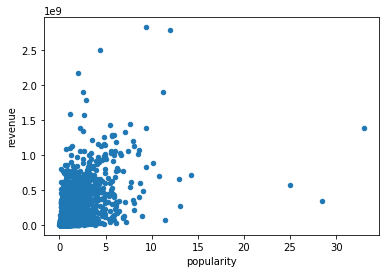

In [28]:
def plot(df, a, b):
    return df.plot(x=a, y=b, kind='scatter')

plot(df3, a='popularity', b='revenue')
plot(df3, a='vote_count', b='revenue')
plot(df3, a='budget', b='revenue');

### Answer 3
Popularity, vote_count, and budget are related to revenue.

<a id='conclusions'></a>
## Conclusions

This time, I analyzed using the dataset of The Movie Database (TMDb). This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  

The highest revenue movie is Avatar.  

Adventure is the most popular genre among the top 100 highest revenue movies. 

The elements related to revenue are budget, popurality, and vote_count.  

10866 data has been reduced to 3852, about 1/3 by deleting data with missing values. This number of data may not be able to explain the whole.

In [29]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1074805 bytes to Investigate_a_Dataset.html
